In [359]:
import numpy as np
import matplotlib.pyplot as plt

In [360]:
# Dimensions
no_of_sources=5
no_of_slots=4
P_total = 0.4
max_iters = 1000
snr=50  #from o to snr

In [361]:
# --- Random initialization ---
np.random.seed(0)
H = np.random.randn(no_of_slots, no_of_sources)
x = np.random.uniform(-1, 1, size=(no_of_sources, 1))  # Uniform distribution between -1 and 1
z = np.random.randn(no_of_slots, 1)



eta = 0.01           # learning rate for B
eta_lambda = 0.1     # learning rate for lambda
tol = 1e-6

In [362]:
B = np.random.randn(no_of_slots, no_of_sources) #intial B value
lambda_reg = 1.0      #inital value of lambda

for iter in range(max_iters):
    BH = B * H
    y = BH @ x - np.sum(x)
    grad = 2 * (y @ x.T) * H + 2 * lambda_reg * B

    # Gradient step
    B_new = B - eta * grad

    # 🔻 Projection onto Frobenius norm ball
    frob_sq = np.sum(B_new ** 2) 
    if frob_sq > P_total:
        B_new = B_new * np.sqrt(P_total / frob_sq)

    # print( np.sum(B_new * B_new,axis=0)<= P_total)

    # Optional dual update
    lambda_reg += eta_lambda * (frob_sq - P_total)
    lambda_reg = max(0, lambda_reg)

    if np.linalg.norm(B_new - B, ord='fro') < tol:
        print(f"Converged at iteration {iter}")
        break

    B = B_new

In [363]:
# Function to compute MMSE for one round
def compute_mmse(B, H, x, snr_db):
    n = B.shape[0]
    BH = B * H
    signal = BH @ x
    P_signal = np.sum(x**2) / n
    snr_linear = 10 ** (snr_db / 10)
    P_noise = P_signal / snr_linear
    z = np.random.normal(0, np.sqrt(P_noise), size=(n, 1))
    y = signal + z
    target = np.sum(x)
    mmse = np.sum((y - target) ** 2) / n
    return mmse

In [364]:
snrs = np.arange(0, snr+1)
mmse_vals = []
for snr_db in snrs:
    mmse_list = [compute_mmse(B, H, x, snr_db) for _ in range(max_iters)]
    mmse_vals.append(np.mean(mmse_list))
    
print("mse",mmse_vals)

mse [0.3777317163040144, 0.31860854037674224, 0.2419195700203003, 0.19345642399522542, 0.154564956959589, 0.12515373599243426, 0.09799626013292166, 0.0733896382357813, 0.061446222553435736, 0.04886645508719408, 0.038454041476808545, 0.029950099562271865, 0.024409985528815684, 0.01923631867260728, 0.01555349864023092, 0.011806664961582907, 0.009583681454130624, 0.007743129202332771, 0.006226251870449612, 0.004955643537234612, 0.0038733400588921844, 0.0031855013959657614, 0.002423654595836118, 0.001976811718104799, 0.0015353521473944584, 0.001215773066169678, 0.0009916069272943564, 0.000794244683908488, 0.0006355344296733856, 0.0005014975560487656, 0.00041411986448753035, 0.00031092016437349746, 0.0002523119553068528, 0.0001969122494968674, 0.00016705326051383732, 0.00012318955672028115, 0.00010365927171787028, 8.326215651954921e-05, 6.872217731048411e-05, 5.459515533045816e-05, 4.351823659907969e-05, 3.6666220578605346e-05, 2.9707036739690763e-05, 2.5216710510153036e-05, 2.1052235000231

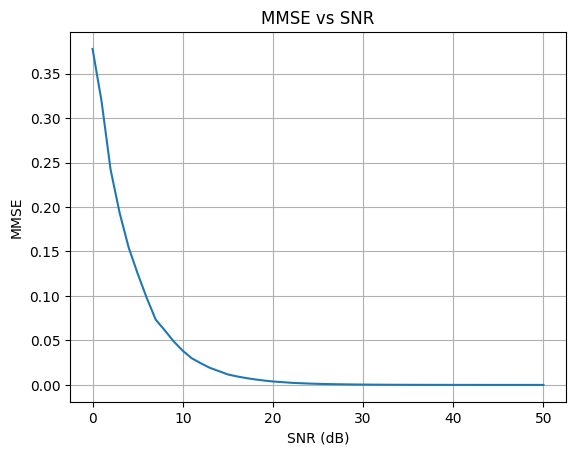

In [365]:
# Plot

plt.plot(snrs, mmse_vals)
plt.xlabel('SNR (dB)')
plt.ylabel('MMSE')
plt.title('MMSE vs SNR')
plt.grid(True)
plt.show()